# Tasks:

* Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.

* Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

* Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

* Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

* Create a draw_box_plot function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##### Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv')
df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


In [3]:
df.index = df['date']
df = df.drop('date', axis=1)
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


##### Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [4]:
lo_view = df['value'] > df['value'].quantile(0.025)
hi_view = df['value'] < df['value'].quantile(0.975)
df_filt = df[(lo_view) & (hi_view)]
a = int(df_filt.count(numeric_only=True))
df_filt

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


###### Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

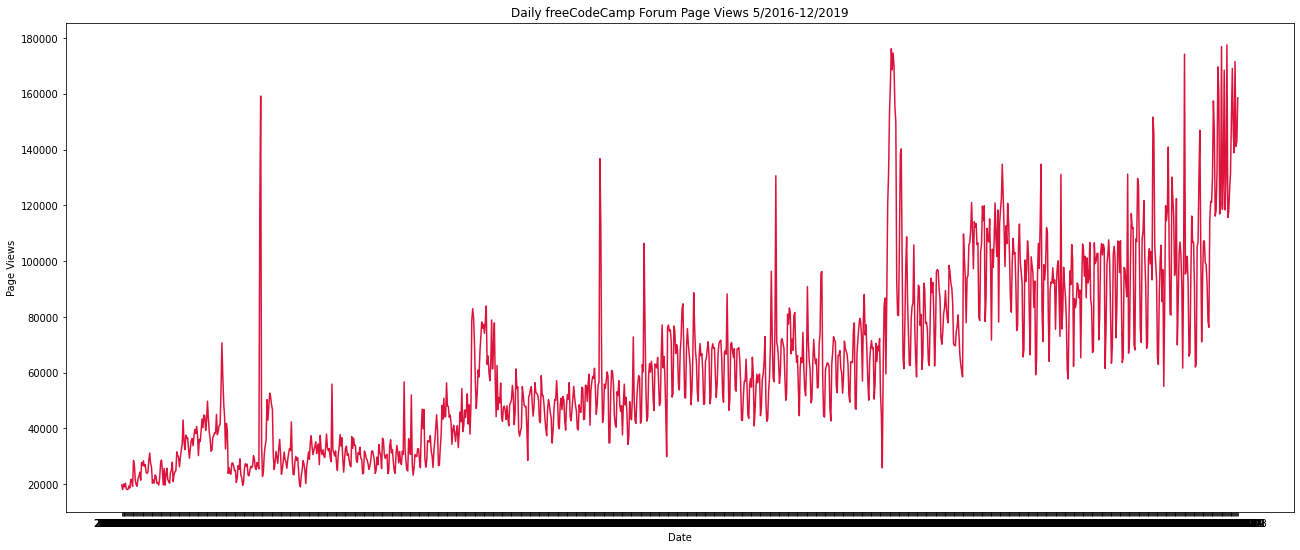

In [5]:
plt.figure(figsize=(22, 9))
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.plot(df_filt.index, df_filt['value'], color='crimson', lw=1.5)
plt.xlabel('Date')
plt.ylabel('Page Views');

###### Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

In [6]:
fil = df_filt
fil.index = pd.to_datetime(fil.index)
fil['day'] = fil.index.day
fil['month'] = fil.index.month
fil['year'] = fil.index.year
look_up = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May',
            6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
fil['month'] = fil['month'].apply(lambda x: look_up[x])
fil

C:\Users\HP\AppData\Local\Temp/ipykernel_8708/2098009384.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fil['day'] = fil.index.day
C:\Users\HP\AppData\Local\Temp/ipykernel_8708/2098009384.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fil['month'] = fil.index.month
C:\Users\HP\AppData\Local\Temp/ipykernel_8708/2098009384.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,value,day,month,year
date,,,,
2016-05-19,19736,19,May,2016
2016-05-26,18060,26,May,2016
2016-05-27,19997,27,May,2016
2016-05-28,19044,28,May,2016
2016-05-29,20325,29,May,2016
...,...,...,...,...
2019-11-24,138875,24,November,2019
2019-11-29,171584,29,November,2019
2019-11-30,141161,30,November,2019


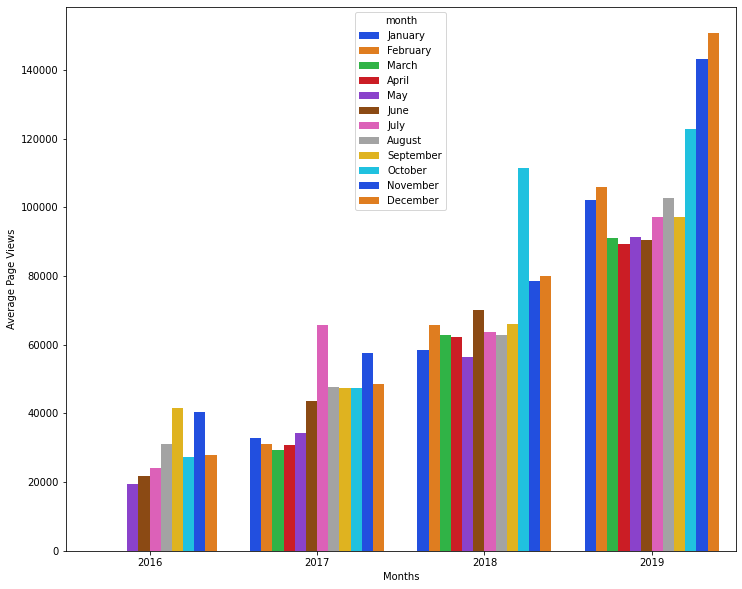

In [7]:
plt.figure(figsize=(12, 10))
bar = sns.barplot(x='year', y='value', data=fil, hue='month', hue_order=['January', 'February', 'March', 'April',
                                                              'May', 'June', 'July', 'August', 'September',
                                                              'October', 'November', 'December'], palette='bright', ci=None)
bar = bar.set(xlabel="Months", ylabel = "Average Page Views")
bar;

###### Create a draw_box_plot function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

In [8]:
fil = df_filt
fil.index = pd.to_datetime(fil.index)
fil['day'] = fil.index.day
fil['month'] = fil.index.month
fil['year'] = fil.index.year
look_up = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
            6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
fil['month'] = fil['month'].apply(lambda x: look_up[x])
fil = fil.rename(columns={'value': 'Page Views', 'year': 'Year', 'month':'Month'})
fil

C:\Users\HP\AppData\Local\Temp/ipykernel_8708/1180605534.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fil['day'] = fil.index.day
C:\Users\HP\AppData\Local\Temp/ipykernel_8708/1180605534.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fil['month'] = fil.index.month
C:\Users\HP\AppData\Local\Temp/ipykernel_8708/1180605534.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,Page Views,day,Month,Year
date,,,,
2016-05-19,19736,19,May,2016
2016-05-26,18060,26,May,2016
2016-05-27,19997,27,May,2016
2016-05-28,19044,28,May,2016
2016-05-29,20325,29,May,2016
...,...,...,...,...
2019-11-24,138875,24,Nov,2019
2019-11-29,171584,29,Nov,2019
2019-11-30,141161,30,Nov,2019


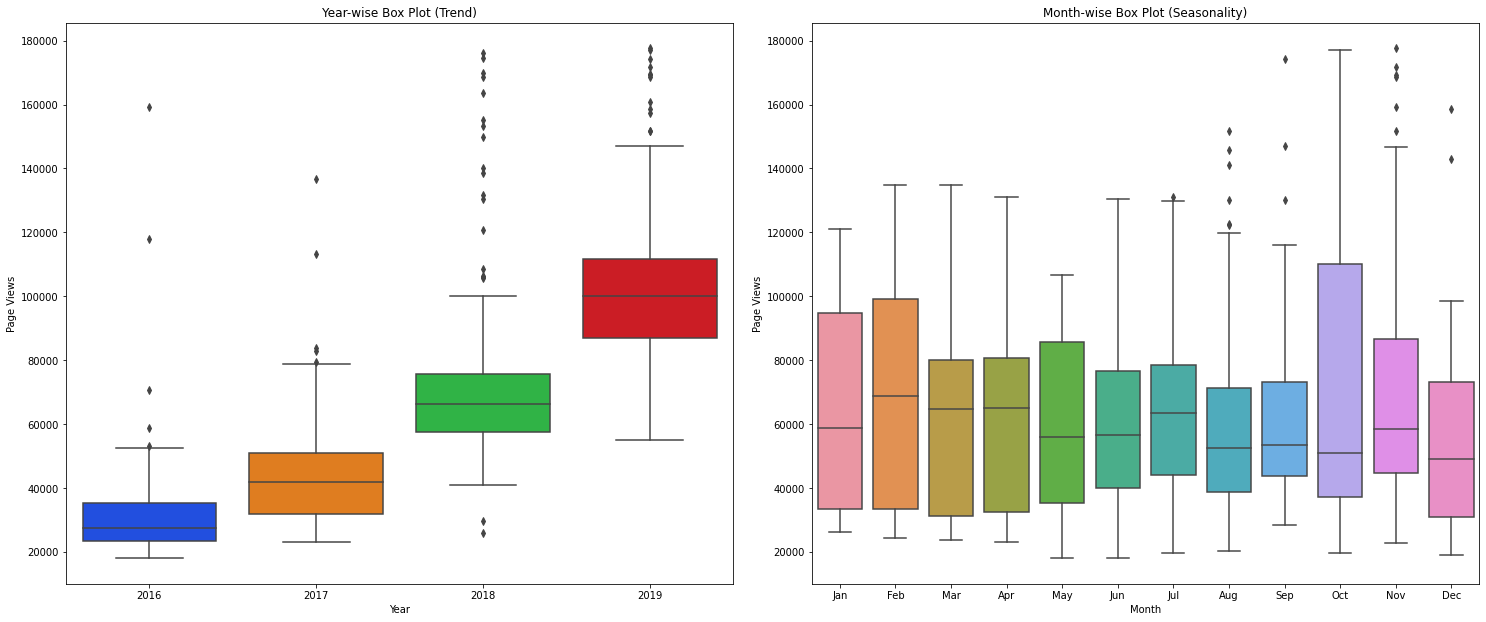

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(21,9))

box_1 = axes[0].set_title('Year-wise Box Plot (Trend)')
sns.boxplot(x='Year', y='Page Views', data=fil, palette='bright', ax=axes[0])


box_2 = axes[1].set_title('Month-wise Box Plot (Seasonality)')
sns.boxplot(x='Month', y='Page Views', data=fil, order=['Jan', 'Feb', 'Mar', 'Apr',
                                                  'May', 'Jun', 'Jul', 'Aug', 'Sep',
                                                  'Oct', 'Nov', 'Dec'], ax=axes[1])


plt.tight_layout(pad=2)
